<a href="https://githubtocolab.com/jmvazqueznicolas/sistemas_inteligentes_23-1/blob/master/P9_Sistemas%20Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

## Training a convnet from scratch on a small dataset

### Downloading the data

In [1]:
!wget "https://dataset-mlproduccion.s3.us-west-1.amazonaws.com/dogs-vs-cats.zip"

--2022-12-06 02:12:21--  https://dataset-mlproduccion.s3.us-west-1.amazonaws.com/dogs-vs-cats.zip
Resolving dataset-mlproduccion.s3.us-west-1.amazonaws.com (dataset-mlproduccion.s3.us-west-1.amazonaws.com)... 52.219.117.170
Connecting to dataset-mlproduccion.s3.us-west-1.amazonaws.com (dataset-mlproduccion.s3.us-west-1.amazonaws.com)|52.219.117.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851576689 (812M) [application/zip]
Saving to: ‘dogs-vs-cats.zip’

dogs-vs-cats.zip      4%[                    ]  38.09M  10.5MB/s    eta 88s    ^C


In [ ]:
!unzip -qo dogs-vs-cats.zip

In [ ]:
!unzip -qo train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 89ms/step - loss: 0.7831 - accuracy: 0.4985 - val_loss: 0.6922 - val_accuracy: 0.5040
Epoch 2/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6970 - accuracy: 0.5480 - val_loss: 0.6672 - val_accuracy: 0.6230
Epoch 3/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6817 - accuracy: 0.5890 - val_loss: 0.7218 - val_accuracy: 0.5910
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6498 - accuracy: 0.6425 - val_loss: 0.7388 - val_accuracy: 0.5840
Epoch 5/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6142 - accuracy: 0.6675 - val_loss: 0.6287 - val_accuracy: 0.6400
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5915 - accuracy: 0.6945 - val_loss: 0.6264 - val_accuracy: 0.6530
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5368 - accuracy: 0.7340 - val_loss: 0.6041 - val_accuracy: 0.7000
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

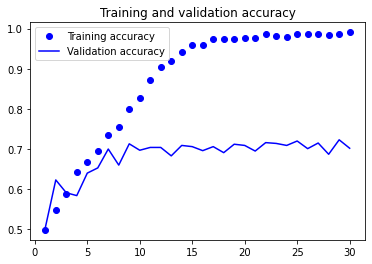

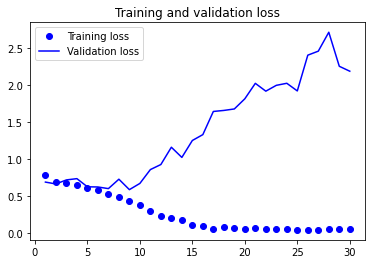

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.6336 - accuracy: 0.6910
Test accuracy: 0.691


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

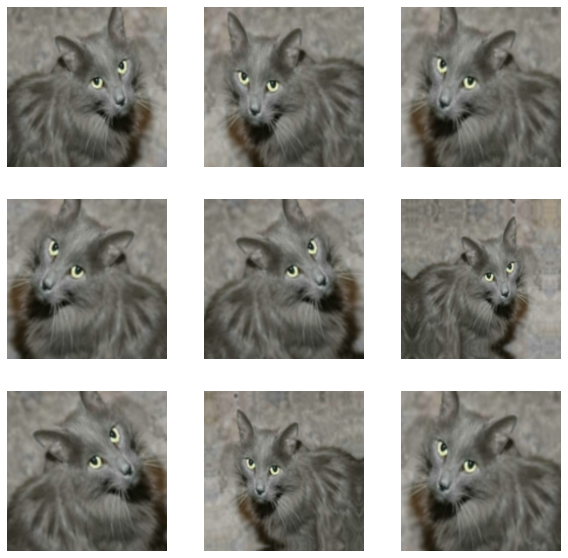

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 6s 78ms/step - loss: 0.7122 - accuracy: 0.4845 - val_loss: 0.6925 - val_accuracy: 0.5150
Epoch 2/100
63/63 [==============================] - 5s 80ms/step - loss: 0.7036 - accuracy: 0.5650 - val_loss: 0.6551 - val_accuracy: 0.5910
Epoch 3/100
63/63 [==============================] - 5s 79ms/step - loss: 0.6521 - accuracy: 0.6140 - val_loss: 0.6619 - val_accuracy: 0.5770
Epoch 4/100
63/63 [==============================] - 5s 78ms/step - loss: 0.6523 - accuracy: 0.6470 - val_loss: 0.9015 - val_accuracy: 0.5650
Epoch 5/100
63/63 [==============================] - 5s 77ms/step - loss: 0.7532 - accuracy: 0.6505 - val_loss: 0.6584 - val_accuracy: 0.6210
Epoch 6/100
63/63 [==============================] - 5s 76ms/step - loss: 0.6185 - accuracy: 0.6670 - val_loss: 0.5978 - val_accuracy: 0.6730
Epoch 7/100
63/63 [==============================] - 5s 75ms/step - loss: 0.5947 - accuracy: 0.6725 - val_loss: 0.7560 - val_accuracy: 0.6070
Epoch 

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.4972 - accuracy: 0.8300
Test accuracy: 0.830


In [ ]:
# Función para cargar una imagen y convertirla al formato
# de entrada de la red.

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

def Single_Image_Prediction(file):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    image= cv2.resize(image, (180,180))
    img_arr = img_to_array(image)
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image

In [ ]:
!wget "https://images-mlproduction.s3.amazonaws.com/mi_gato.jpg"

--2022-08-15 00:29:27--  https://images-mlproduction.s3.amazonaws.com/mi_gato.jpg
Resolving images-mlproduction.s3.amazonaws.com (images-mlproduction.s3.amazonaws.com)... 54.231.232.1
Connecting to images-mlproduction.s3.amazonaws.com (images-mlproduction.s3.amazonaws.com)|54.231.232.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88976 (87K) [image/jpeg]
Saving to: ‘mi_gato.jpg’

mi_gato.jpg         100%[===================>]  86.89K  --.-KB/s    in 0.06s   

2022-08-15 00:29:28 (1.47 MB/s) - ‘mi_gato.jpg’ saved [88976/88976]



In [ ]:
!wget "https://images-mlproduction.s3.amazonaws.com/perrito2.jpg"

--2022-08-15 00:29:33--  https://images-mlproduction.s3.amazonaws.com/perrito2.jpg
Resolving images-mlproduction.s3.amazonaws.com (images-mlproduction.s3.amazonaws.com)... 52.216.143.36
Connecting to images-mlproduction.s3.amazonaws.com (images-mlproduction.s3.amazonaws.com)|52.216.143.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3940930 (3.8M) [image/jpeg]
Saving to: ‘perrito2.jpg’

perrito2.jpg        100%[===================>]   3.76M  18.3MB/s    in 0.2s    

2022-08-15 00:29:34 (18.3 MB/s) - ‘perrito2.jpg’ saved [3940930/3940930]



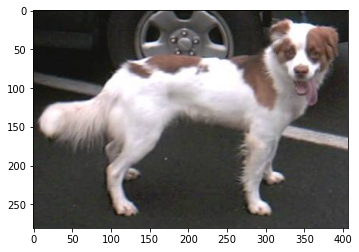

[[0.99651426]]
Me parece que he visto un lindo perrito


In [ ]:
import numpy as np

image = Single_Image_Prediction('/content/cats_vs_dogs_small/test/dog/dog.1500.jpg')
pred_value = model.predict(image)
print(pred_value)
if pred_value < 0.5:
    print('Me parece que he visto un lindo gatito')
else:
    print('Me parece que he visto un lindo perrito')

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

KeyboardInterrupt: ignored

In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 16.8558 - accuracy: 0.9280 - val_loss: 5.4746 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 3.9109 - accuracy: 0.9725 - val_loss: 2.6974 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.9701 - accuracy: 0.9840 - val_loss: 5.8543 - val_accuracy: 0.9620
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 2.1894 - accuracy: 0.9880 - val_loss: 11.4861 - val_accuracy: 0.9470
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7916 - accuracy: 0.9940 - val_loss: 3.4182 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3133 - accuracy: 0.9965 - val_loss: 7.0928 - val_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7886 - accuracy: 0.9935 - val_loss: 4.4119 - val_accuracy: 0.9760
Epoch 8/20
63/63

**Plotting the results**

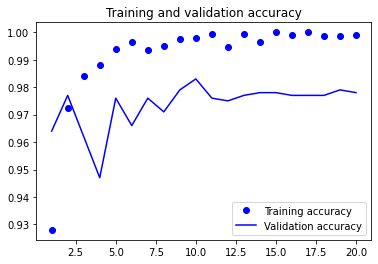

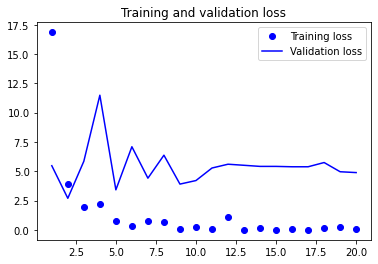

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
22/63 [=========>....................] - ETA: 5s - loss: 2.4010 - accuracy: 0.9716

KeyboardInterrupt: ignored

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 115ms/step - loss: 2.7616 - accuracy: 0.9775
Test accuracy: 0.978


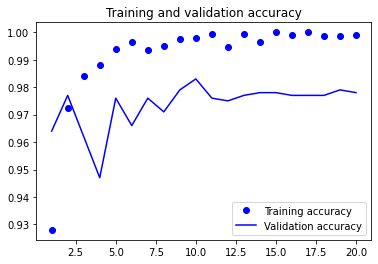

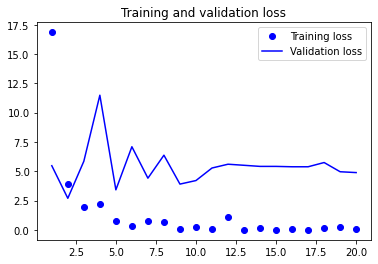

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

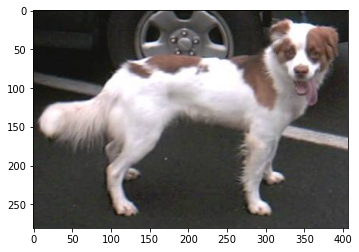

[[1.]]
Me parece que he visto un lindo perrito


In [ ]:
import numpy as np

image = Single_Image_Prediction('/content/cats_vs_dogs_small/test/dog/dog.1500.jpg')
pred_value = model.predict(image)
print(pred_value)
if pred_value < 0.5:
    print('Me parece que he visto un lindo gatito')
else:
    print('Me parece que he visto un lindo perrito')

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 204ms/step - loss: 1.0350 - accuracy: 0.9815 - val_loss: 3.9294 - val_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 13s 203ms/step - loss: 1.1548 - accuracy: 0.9825 - val_loss: 3.2622 - val_accuracy: 0.9840
Epoch 3/30
35/63 [===============>..............] - ETA: 3s - loss: 0.7637 - accuracy: 0.9929

KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 112ms/step - loss: 2.5409 - accuracy: 0.9760
Test accuracy: 0.976


In [ ]:
# Función para cargar una imagen y convertirla al formato
# de entrada de la red.

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

def Single_Image_Prediction(file):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    image= cv2.resize(image, (180,180))
    img_arr = img_to_array(image)
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image

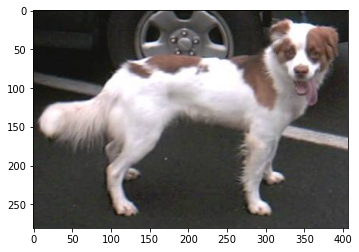

[[1.]]
Me parece que he visto un lindo perrito


In [ ]:
import numpy as np

image = Single_Image_Prediction('/content/cats_vs_dogs_small/test/dog/dog.1500.jpg')
pred_value = model.predict(image)
print(pred_value)
if pred_value < 0.5:
    print('Me parece que he visto un lindo gatito')
else:
    print('Me parece que he visto un lindo perrito')